In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

settings = {
    'figure.dpi': 300,
    'figure.subplot.left': 0,
    'figure.subplot.right': 1,
    'figure.subplot.top': 1,
    'figure.subplot.bottom': 0,
    'figure.subplot.hspace': 0.0,
    'figure.subplot.wspace': 0.0,
    'font.family': 'Arial',
    'font.size': 6.5,
    'lines.linewidth': 0.5,
    'lines.markersize': 3,
    'patch.linewidth': 0.5,
    'axes.linewidth': 0.5,
    'axes.spines.bottom': 'on',
    'axes.spines.left': 'on',
    'axes.spines.top': 'off',
    'axes.spines.right': 'off',
    'axes.labelweight': 'normal',
    'axes.xmargin': 0.02,
    'axes.ymargin': 0.02,
    'axes.grid': 'off',
    'axes.labelpad': 2,
    'axes.titlepad': 2,
    #'axes.prop_cycle': cycler(color=['r', 'g', 'b', 'y']),
    'xtick.major.size': 2.5,
    'ytick.major.size': 2.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'xtick.major.pad': 1.5,
    'ytick.major.pad': 1.5,
    'legend.frameon': True,
    # 'legend.edgecolor': gray,
    # 'legend.columnspacing': 
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    }


mpl.rcParams.update(mpl.rcParamsDefault)
for k,v in settings.items():
    mpl.rcParams[k] = settings[k]

# Choose a color pallette with sns.set_pallette(pallette_name)
# alternatively, use the pallette keyword in plots to set specific colors
# Palletes can be found here
# https://seaborn.pydata.org/generated/seaborn.color_palette.html
sns.set_palette('deep')
# deep, muted, pastel, bright, colorblind, dark
# Set2, rainbow, seismic, tab10, tab20, tab20c

# Styles. 
#plt.style.use('ggplot')
#plt.style.use('seaborn-v0_8-paper')
#print(mpl.style.available)

In [6]:
# encapsulation plots
from scipy.special import factorial

# First graph
df = pd.DataFrame(columns=['λ', 'k', 'p(k)'])
for λ in [0.1, 1,4]:
    for k in np.arange(0,9):
        p_k=(np.power(λ,k) *np.exp(-λ))/factorial(k)
        df = df._append({'λ':λ,'k':k,'p(k)': p_k}, ignore_index=True)
df = df.astype({'λ': 'category', 'k': 'int32', 'p(k)': 'float',})

# 2nd graph
df2 = pd.DataFrame(columns=['λ', 'k', 'p(k)'])
for k in np.arange(0,4):
    λ = np.linspace(0,3,100)
    p_k=(np.power(λ,k) *np.exp(-λ))/factorial(k)
    df2 = df2._append(pd.DataFrame({'λ':λ,'k':k,'p(k)': p_k}), ignore_index=True)  #)

df2 = df2.astype({'λ': 'float', 'k': 'category', 'p(k)': 'float',})

# Third and fourth graphs
df3 = pd.DataFrame(columns=['Error Type', 'λ', '95% CI (% of mean)'])
λ = np.logspace(-2,1,100)
E = np.exp(-λ)
for N in [1e4, 1e5, 1e6]:
    m = N*λ;
    u_sub = 1.96*np.sqrt(m)/m*100
    E_std = np.sqrt(E*(1-E)/N)
    u_prt = (1/λ)*np.log((E+1.96*E_std)/(E-1.96*E_std))*100
    df3 = df3._append(pd.DataFrame({'N': N, 'Error Type': 'Subsampling', 'λ': λ, '95% CI (% of mean)': u_sub}), ignore_index=True)  #)
    df3 = df3._append(pd.DataFrame({'N': N, 'Error Type': 'Partitioning', 'λ': λ, '95% CI (% of mean)': u_prt}), ignore_index=True)  #)


C:\Users\ea4241\AppData\Local\Temp\ipykernel_8556\1846018620.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({'λ':λ,'k':k,'p(k)': p_k}, ignore_index=True)
C:\Users\ea4241\AppData\Local\Temp\ipykernel_8556\1846018620.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = df2._append(pd.DataFrame({'λ':λ,'k':k,'p(k)': p_k}), ignore_index=True)  #)
C:\Users\ea4241\AppData\Local\Temp\ipykernel_8556\1846018620.py:29: RuntimeWarning: invalid value encountered in log
  u_prt = (1

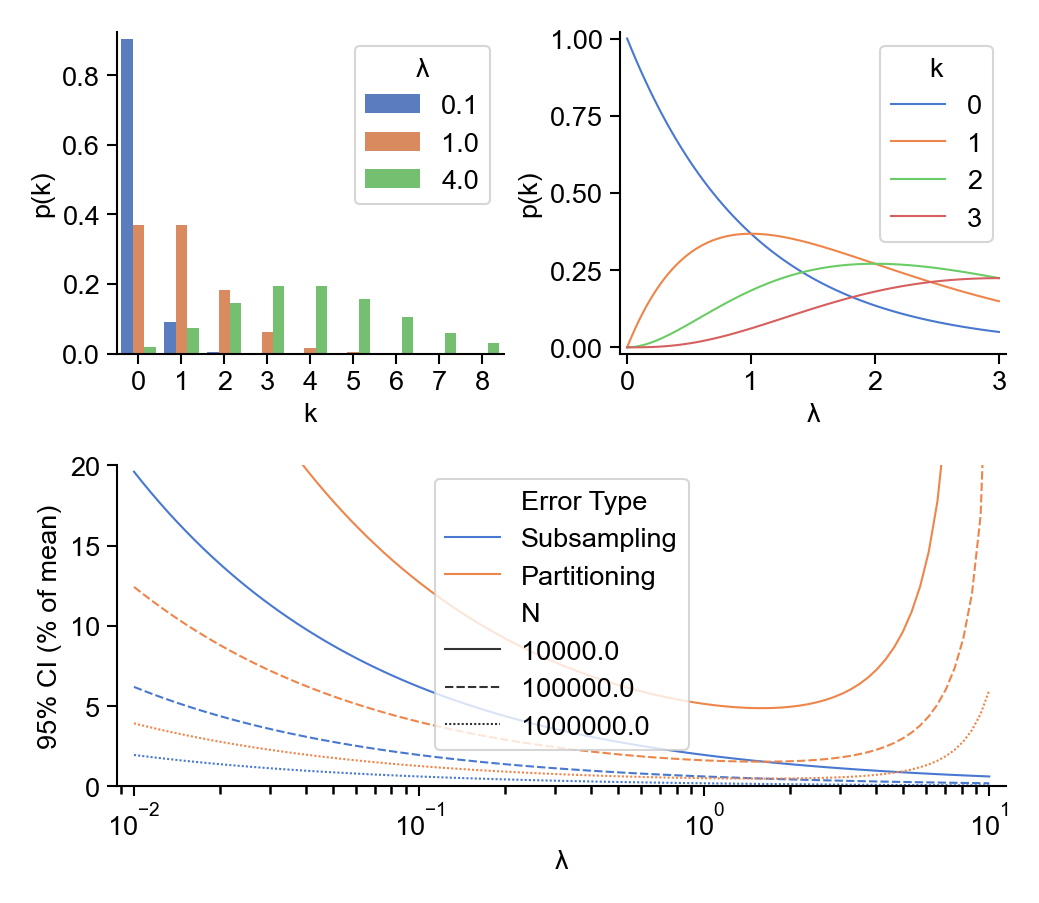

In [16]:
sns.set_palette('muted');
#fig, ax = plt.subplots(2,2, figsize=(4.5,3.5));
fig = plt.figure(figsize=(3.5,3));
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
ax = [ax1, ax2, ax3]
#ax = ax.flatten();
sns.barplot(data = df, x='k', y='p(k)', hue='λ', ax = ax[0]);
#sns.set_palette('tab20c');
sns.lineplot(data = df2, x='λ', y='p(k)', hue='k', ax = ax[1]);
#sns.lineplot(data = df3.loc[df3['N']==20000], x='λ', y='95% CI (% of mean)', hue='Error Type', ax = ax[2]);
#ax[2].set_ylim(0,10);
sns.lineplot(data = df3.loc[df3['N']<=1e6], x='λ', y='95% CI (% of mean)', hue='Error Type', style="N", ax = ax[2]);
sns.move_legend(ax[2], loc = "upper center" ) #upper left", bbox_to_anchor = (0.5, 1))
ax[2].set_ylim(0,20);
ax[2].set_xscale('log');


#sns.lineplot(data = df3, x='λ', y='p(k)', hue='k', ax = ax[1]);,
plt.tight_layout();
plt.savefig('fig2.svg')
plt.show()
